In [11]:
'''
Изучите данные по динамике изменения величины прожиточного минимума в городе Москве:
Проверьте, что значения AveragePerCapita не распределены нормально (через QQ-Plot или любым другим методом).

Проведите дисперсионный анализ для серий Seniors и Children и установите, с каким p-уровнем значимости средние
этих серий различаются.

Постройте регрессионную модель AveragePerCapita от Quarter, WorkingPopulation, Seniors и Children.
Выпишите коэффициенты линейной модели и сделайте предсказание на второй квартал 2020 года'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as st
data_ = pd.read_csv("http://video.ittensive.com/math-stat/data-6048-2020-06-29.utf.csv",delimiter=';',
                    usecols=['Quarter', 'AveragePerCapita','WorkingPopulation','Seniors','Children'])
print (data_.head())

                 Quarter  AveragePerCapita  WorkingPopulation  Seniors  \
0   2007 год. I квартал               5609               6360     3830   
1  2007 год. II квартал               5772               6533     3967   
2  2007 год. III квартал              5795               6563     3983   
3  2007 год. IV квартал               5855               6624     4038   
4   2008 год. I квартал               6441               7288     4408   

   Children  
0      4780  
1      4936  
2      4934  
3      4997  
4      5547  


In [4]:
n = np.array(data_['AveragePerCapita'])

print ("Математическое ожидание", np.mean(n))
print ("среднеквадратичное отклонение", np.std(n))



Математическое ожидание 11570.471698113208
среднеквадратичное отклонение 3875.2538254239753


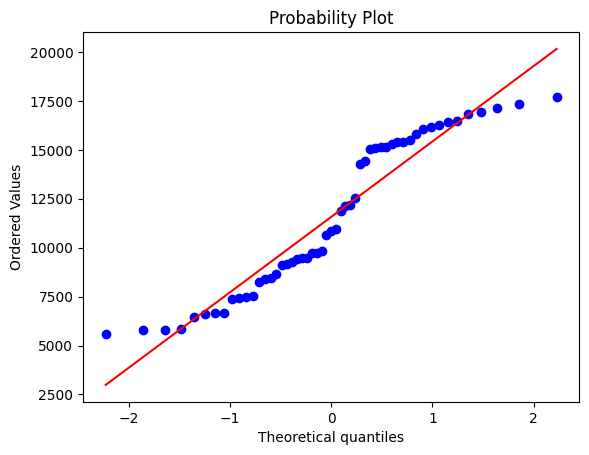

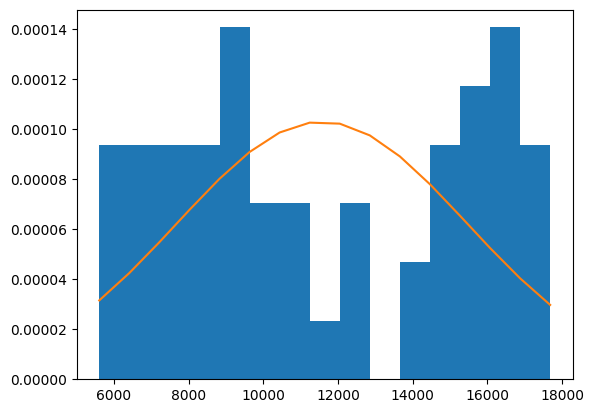

In [24]:
# по графикам ниже видно что набор значений не являается нормальнораспределённым, присутсвует большое отклонение от базовой линии
st.probplot(n, dist='norm', plot=plt)
plt.show()
count, bins, _ = plt.hist(n, 15, density=True) 
plt.plot(bins, 1/(np.std(n) * np.sqrt(2 * np.pi)) * np.exp(- (bins - np.mean(n))**2 / (2 * np.std(n)**2)))
plt.show()

In [12]:
"""Однофакторный дисперсионный анализ"""
s = np.array(data_['Seniors'])
#print(s)
c =  np.array(data_['Children'])  
#print(c)
stats = st.f_oneway(s, c)
#stats_= st.ttest_ind(s, c)
if stats[1] > 0.1:
    print ("выборки Seniors и Children не различаются")
elif stats[1] > 0.05:
    print ("выборки Seniors и Children различаются с вероятностью ", 100 - stats[1],"процентов")
elif stats[1] > 0.01: 
    print ("выборки Seniors и Children различаются с вероятностью ", 100 - stats[1],"процентов")
else:
    print ("c p-уровнем значимости", stats[1],"различаются средние этих серий")




c p-уровнем значимости 0.002754290107684821 различаются средние этих серий


In [40]:
'''x = np.array(data_["Quarter"]).reshape(-1, 1)
for q in range(len(x)): # соединяем год и квартал
    if q < 1 or str(x[q][0][:4]) != str(x[q-1][0][:4]):# первый квартал каждого года
        a = 1
    elif str(x[q][0][:4])==str(x[q-1][0][:4]):#следующие квартала
        a = a+1
    x[q][0] = x[q][0][:4]+ str(a)
    [хороший такой алгоритм, жаль что не пригодился]'''

y = data_["AveragePerCapita"]
xa = list(range (1,len(y)+1)) #сплошная нумерация кварталов 2007№1->1...2008№1->5,2008№2->6....
data_["NumQuarter"] = xa # добавляем сплошную нумерацию кварталов в данные, стобец "NumQuarter"

#  модель AveragePerCapita от Quarter для прогноза
x = np.array(data_["NumQuarter"]).reshape(-1, 1)
y_ = np.array(data_["AveragePerCapita"]).reshape(-1, 1)
model_ = LinearRegression().fit(x,y_)
#print (model_.coef_) # визуальныцй контроль
#print (model_.intercept_)# визуальныцй контроль
# модель AveragePerCapita от Quarter, WorkingPopulation, Seniors и Children
y = data_["AveragePerCapita"]
x_n = data_.drop(labels=['Quarter','AveragePerCapita'], axis=1) # удаляем не нужные столбцы
#print (x_n.tail()) #визуальный контроль
#print ('AveragePerCapita')# визуальныцй контроль
#print (y.tail()) # визуальныцй контроль
model = mod_s = LinearRegression().fit(x_n,y)
r_sq_base = model.score(x_n, y) #рассчитываем базовый коэффициент детерминации
print ('базовый коэффициент детерминации для нескольких факторов', r_sq_base)
y_ = (x_n * model.coef_)
y_['summa'] = y_.sum(axis=1)
print ("коэффициенты для факторов",model.coef_)
#print (y_.tail(2)) # визуальныцй контроль


базовый коэффициент детерминации для нескольких факторов 0.9999775604333078
коэффициенты для факторов [0.66846678 0.01209445 0.23988836 3.80791504]


C:\Users\famely\AppData\Local\Temp\ipykernel_17904\2604522167.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_.corr().values # Получаем значения корреляций факторов
C:\Users\famely\AppData\Local\Temp\ipykernel_17904\2604522167.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print (data_.corr().values)


[[1.         0.99994498 0.99906163 0.99949131 0.98482985]
 [0.99994498 1.         0.99876627 0.9991852  0.98426657]
 [0.99906163 0.99876627 1.         0.99936405 0.98534676]
 [0.99949131 0.9991852  0.99936405 1.         0.98407882]
 [0.98482985 0.98426657 0.98534676 0.98407882 1.        ]]


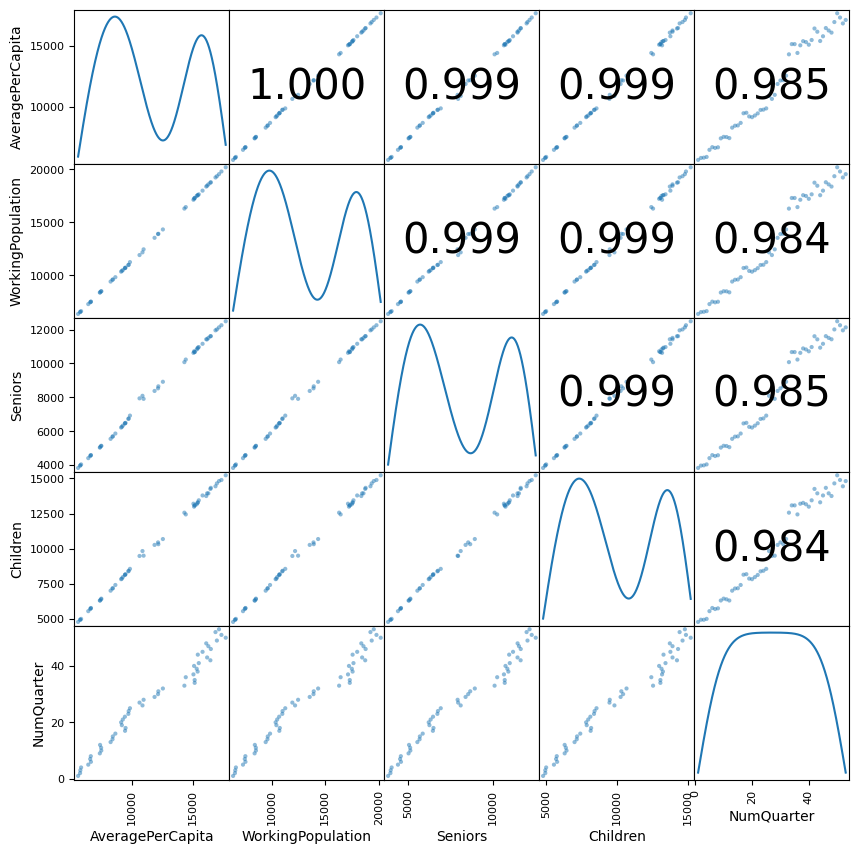

In [14]:
'''проверяем корреляцию факторов'''
axes = pd.plotting.scatter_matrix(data_, figsize=(10, 10), diagonal="kde", grid=True)
corr = data_.corr().values # Получаем значения корреляций факторов
print (data_.corr().values)
# Выводим корреляцию на графике
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i, j], (0.5, 0.5), size=((abs(corr[i, j]))**0.2)*30,
                       xycoords='axes fraction', ha='center', va='center')
#plt.show() # выводим график

In [36]:
#"вычисляем меньшую корреляцию"
#a = 1 
#list_=[]
#For q in corr[0]:
#    if q < 0.995 and q < a: #если кореляция фактора > 0,995, для прогноза можно фактором пренебречь
#        a = q #
#list_.append(list(np.where(corr == a)[0]))
#print ('номер фактора имеющего наибольшую корреляцию ',list_[0][1])
    

In [42]:
'''Перебираем факторы по одному и ищем наилучшую комбинацию'''

labels = ["WorkingPopulation", "Seniors", "Children", "NumQuarter"]
for label in labels:
    x_optimized = x_n.drop(labels=[label], axis=1) # удаляем фактор из данных
    model_optimized = LinearRegression().fit(x_optimized, y) # пересчитываем оптимизированную модель
    r_sq_optimized = model_optimized.score(x_optimized, y) # оцениваем коэффициент детерминации
    #print(r_sq_optimized,r_sq_base)
    if r_sq_optimized > r_sq_base: # если исключение фактора улучшило детерминацию, оставляем новый набор
        x_n = x_optimized
        model= model_optimized # сохраняем оптимизированную модель
        
if len(model.coef_) == len(mod_s.coef_):
    print ("модель не изменилась")
print (model.intercept_)
print (model.coef_)


модель не изменилась
173.41037626685102
[0.66846678 0.01209445 0.23988836 3.80791504]


In [44]:
prn=((len(y)+1)*model_.coef_ + model_.intercept_)
print ("прогнозируемая средняя величина прожиточного мимнимума во втором квартале 2020 от квартала:",'%.2f'%prn, "руб.")

прогнозируемая средняя величина прожиточного мимнимума во втором квартале 2020 от квартала: 18306.71 руб.
